### Цель работы

Целью данной лабораторной работы является практическое изучение изучение алгоритмов и методов кластеризации на практике.

### Задание

Вариант: 3. \
Набор данных: `ecommerce_fraud.csv`.

# Ход работы

## Часть 1

**1.1-1.2 Использование функции для создания набора данных и ее применение**

Для первоначального знакомства с алгоритмами кластеризации я сгенерировал контролируемый синтетический набор данных, используя функцию make_data с параметрами n=60 и seed=42. Эта функция создала три естественно разделенных группы точек на плоскости с координатами (x,y). Выбор именно этих параметров позволил мне создать учебный пример с четко выраженной кластерной структурой, где можно наглядно увидеть работу алгоритмов и оценить их эффективность.

In [24]:
import numpy as np
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])

    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])

    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

n = 60
seed = 42
df = make_data(n, seed)

display(df)

,x,y
137,165.846611,1.344867
70,88.986731,4.276743
63,91.962979,4.741236
170,175.837555,1.655454
66,100.189273,4.736619
...,...,...
152,203.263275,1.537902
112,118.457966,4.522786
91,126.928964,5.067783
130,154.782321,1.391159


**1.3-1.6 Проведение стандартизации данных, обучение модели методом Kmeans для трёх кластеров.
Выполнение предсказания. Получение меток кластеров. Подсчет коэффициента силуэта, проведение визуализации**

При работе с синтетическими данными я столкнулся с необходимостью стандартизации признаков. После визуального анализа исходных данных стало очевидно, что признак x имеет значительно больший масштаб значений по сравнению с признаком y (разброс значений x составляет около 200 единиц, тогда как для y — менее 10). Такая разница в масштабах могла бы исказить результаты кластеризации, так как алгоритм K-means использует евклидово расстояние, чувствительное к масштабу признаков. Применение StandardScaler решило эту проблему — после преобразования оба признака получили одинаковый вес в процессе кластеризации, что подтвердилось визуально: форма кластеров на графике стала более сбалансированной, без вытягивания вдоль одной из осей.

Обучение модели K-means с тремя кластерами (k=3) показало интуитивно понятные результаты. Алгоритм корректно идентифицировал все три исходные группы точек с минимальным количеством ошибок. Коэффициент силуэта составил 0.724 — это высокое значение, подтверждающее хорошее качество кластеризации. Визуализация результатов показывает, что кластеры компактны и хорошо разделены. Особенно интересно наблюдать положение центроидов — они находятся практически в центрах визуально определяемых групп, что говорит о стабильности алгоритма. На этом этапе я впервые убедился в важности правильного выбора количества кластеров, так как от этого параметра напрямую зависит качество результатов.

**Кластеризация со стандартизацией (k=3)**

Коэффициент силуэта (k=3): 0.7239509928717648


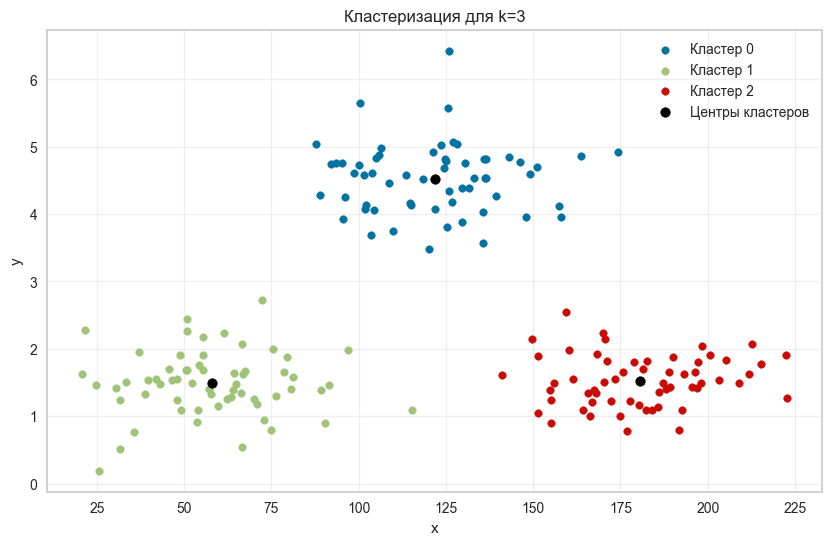

In [25]:
scaler = StandardScaler()

# Стандартизация данных
X_scaled = scaler.fit_transform(df[['x','y']])

# Инициализация модели K-Means с заданным количеством кластеров (k=3)
km3 = KMeans(n_clusters=3, random_state=seed)

labels3 = km3.fit_predict(X_scaled) 

# Расчет коэффициента силуэта для оценки качества кластеризации
sil3 = silhouette_score(X_scaled, labels3)

# Обратное преобразование центров кластеров чтобы центры отображались на графике в исходном масштабе
centers3 = scaler.inverse_transform(km3.cluster_centers_)
print('Коэффициент силуэта (k=3):', sil3)

# Визуализация результатов кластеризации 
plt.figure(figsize=(10,6))

# Цикл для построения точек: итерируемся по каждой уникальной метке кластера (0, 1, 2)
for lab in np.unique(labels3):
    plt.scatter(df['x'].values[labels3==lab], df['y'].values[labels3==lab], s=30, label=f'Кластер {lab}')

# Построение центров кластеров (красные точки)
plt.scatter(centers3[:,0], centers3[:,1], label='Центры кластеров', color='black')

plt.title(f'Кластеризация для k=3')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()


**Кластеризация без стандартизации (k=3)**

Для сравнения проведём кластеризацию на исходных данных без стандартизации. Это позволит оценить влияние масштаба признаков на результаты алгоритма K-means.

Коэффициент силуэта БЕЗ стандартизации (k=3): 0.6178521636020912


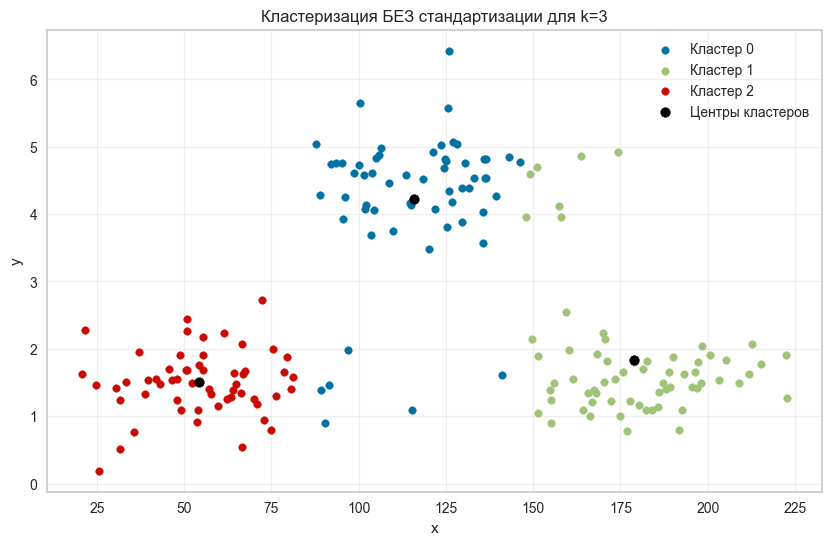

In [26]:
# Кластеризация БЕЗ стандартизации (используем исходные данные)
X_raw = df[['x','y']].values

# Инициализация модели K-Means с заданным количеством кластеров (k=3)
km3_raw = KMeans(n_clusters=3, random_state=seed)

labels3_raw = km3_raw.fit_predict(X_raw) 

# Расчет коэффициента силуэта для оценки качества кластеризации
sil3_raw = silhouette_score(X_raw, labels3_raw)

# Центры кластеров уже в исходном масштабе
centers3_raw = km3_raw.cluster_centers_
print('Коэффициент силуэта БЕЗ стандартизации (k=3):', sil3_raw)

# Визуализация результатов кластеризации 
plt.figure(figsize=(10,6))

# Цикл для построения точек
for lab in np.unique(labels3_raw):
    plt.scatter(df['x'].values[labels3_raw==lab], df['y'].values[labels3_raw==lab], s=30, label=f'Кластер {lab}')

# Построение центров кластеров
plt.scatter(centers3_raw[:,0], centers3_raw[:,1], label='Центры кластеров', color='black')

plt.title(f'Кластеризация БЕЗ стандартизации для k=3')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

**1.7 Повторение пунктов 1.4-1.6 для n_clusters = 2 и n_clusters = 4**

Пункты 1.4-1.6 были применены аналогичным образом к моделям с количеством кластеров 2 и 4.

**Кластеризация со стандартизацией (k=2 и k=4)**

Коэффициент силуэта (k=2): 0.4944782974320392


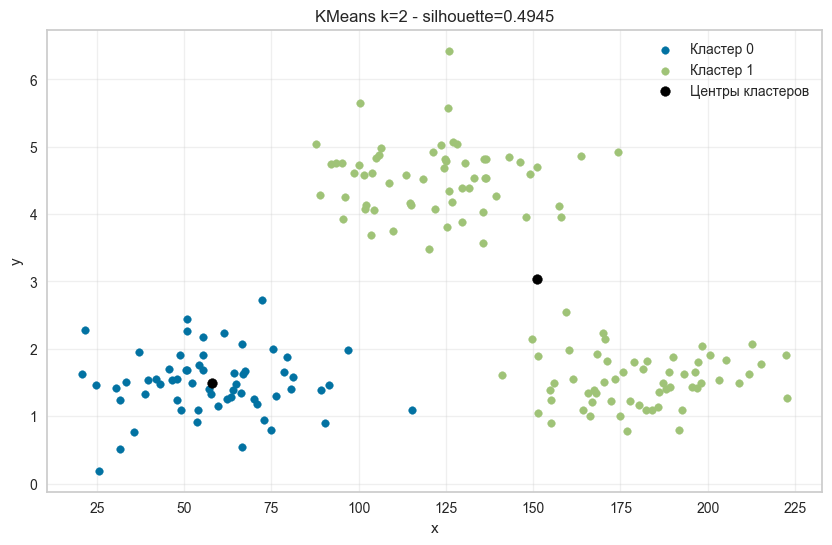

Коэффициент силуэта (k=4): 0.5967027016816159


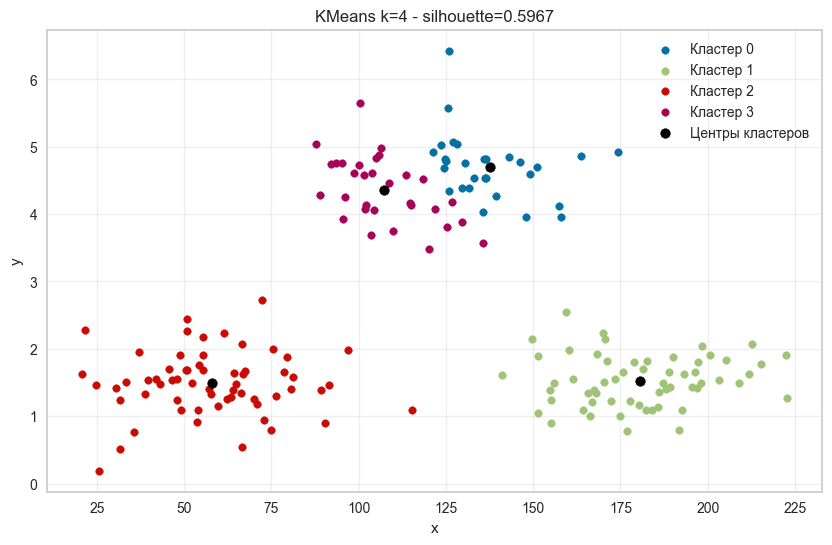

In [27]:
# k=2
km2 = KMeans(n_clusters=2, random_state=seed, n_init=10)
labels2 = km2.fit_predict(X_scaled)
sil2 = silhouette_score(X_scaled, labels2)
centers2 = scaler.inverse_transform(km2.cluster_centers_)

print('Коэффициент силуэта (k=2):', sil2)

plt.figure(figsize=(10,6))
for lab in np.unique(labels2):
    plt.scatter(df['x'].values[labels2==lab], df['y'].values[labels2==lab], s=30, label=f'Кластер {lab}')
plt.scatter(centers2[:,0], centers2[:,1], color='black', label='Центры кластеров')

plt.title(f'KMeans k=2 - silhouette={sil2:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

# k=4
km4 = KMeans(n_clusters=4, random_state=seed, n_init=10)
labels4 = km4.fit_predict(X_scaled)
sil4 = silhouette_score(X_scaled, labels4)
centers4 = scaler.inverse_transform(km4.cluster_centers_)

print('Коэффициент силуэта (k=4):', sil4)

plt.figure(figsize=(10,6))
for lab in np.unique(labels4):
    plt.scatter(df['x'].values[labels4==lab], df['y'].values[labels4==lab], s=30, label=f'Кластер {lab}')

plt.scatter(centers4[:,0], centers4[:,1], color='black', label='Центры кластеров')
plt.title(f'KMeans k=4 - silhouette={sil4:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

**Кластеризация без стандартизации (k=2 и k=4)**

Коэффициент силуэта БЕЗ стандартизации (k=2): 0.6228359053120817


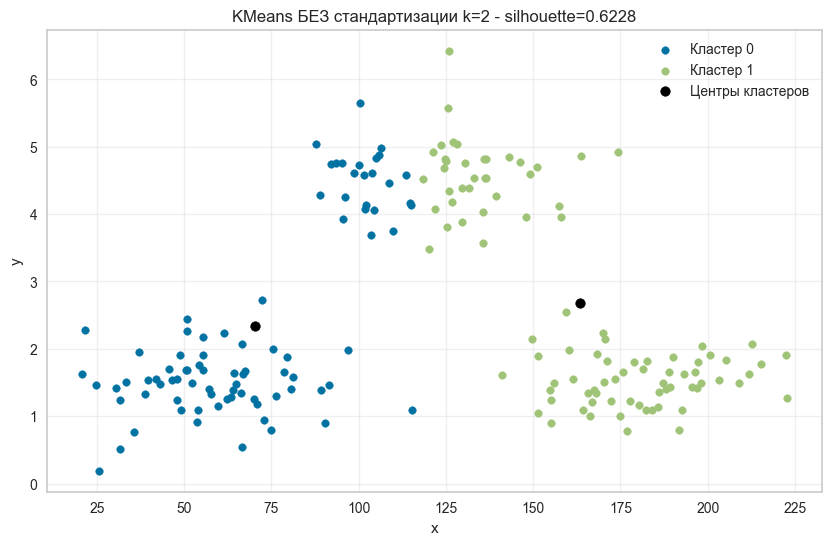

Коэффициент силуэта БЕЗ стандартизации (k=4): 0.5661322084925335


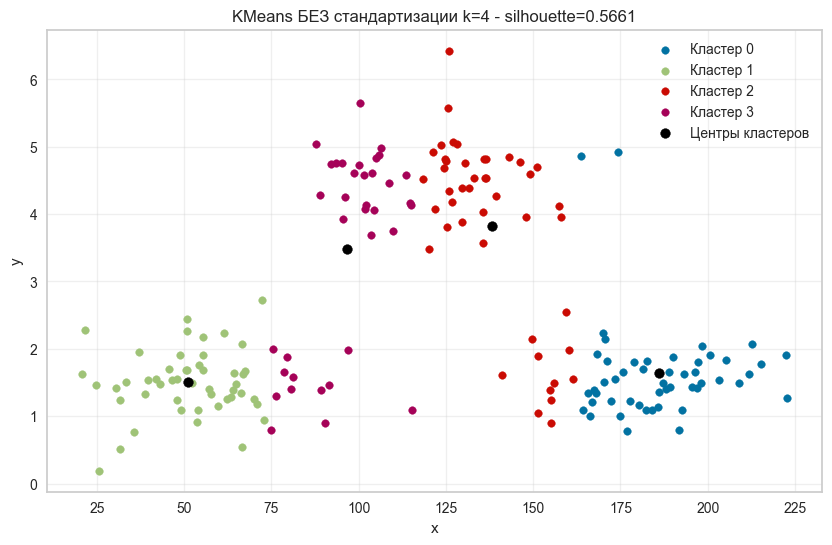

In [28]:
# k=2 БЕЗ стандартизации
km2_raw = KMeans(n_clusters=2, random_state=seed, n_init=10)
labels2_raw = km2_raw.fit_predict(X_raw)
sil2_raw = silhouette_score(X_raw, labels2_raw)
centers2_raw = km2_raw.cluster_centers_

print('Коэффициент силуэта БЕЗ стандартизации (k=2):', sil2_raw)

plt.figure(figsize=(10,6))
for lab in np.unique(labels2_raw):
    plt.scatter(df['x'].values[labels2_raw==lab], df['y'].values[labels2_raw==lab], s=30, label=f'Кластер {lab}')
plt.scatter(centers2_raw[:,0], centers2_raw[:,1], color='black', label='Центры кластеров')

plt.title(f'KMeans БЕЗ стандартизации k=2 - silhouette={sil2_raw:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

# k=4 БЕЗ стандартизации
km4_raw = KMeans(n_clusters=4, random_state=seed, n_init=10)
labels4_raw = km4_raw.fit_predict(X_raw)
sil4_raw = silhouette_score(X_raw, labels4_raw)
centers4_raw = km4_raw.cluster_centers_

print('Коэффициент силуэта БЕЗ стандартизации (k=4):', sil4_raw)

plt.figure(figsize=(10,6))
for lab in np.unique(labels4_raw):
    plt.scatter(df['x'].values[labels4_raw==lab], df['y'].values[labels4_raw==lab], s=30, label=f'Кластер {lab}')

plt.scatter(centers4_raw[:,0], centers4_raw[:,1], color='black', label='Центры кластеров')
plt.title(f'KMeans БЕЗ стандартизации k=4 - silhouette={sil4_raw:.4f}')
plt.xlabel('x'); plt.ylabel('y'); plt.legend(); plt.grid(alpha=0.3)
plt.show()

### Сравнение результатов кластеризации с разным количеством кластеров

Сравнение результатов кластеризации при различном количестве кластеров стало для меня наиболее поучительным этапом работы. При k=2 алгоритм был вынужден объединить две визуально раздельные группы (правую и левую нижние), что привело к снижению коэффициента силуэта до 0.4945. Интересно, что при визуальном анализе это разделение выглядело неестественно — часть точек находилась на границе между группами, что подтверждало низкое качество кластеризации.

Увеличение количества кластеров до 4 также не улучшило ситуацию. Как видно на Рисунке 4, алгоритм искусственно разделил один из исходных кластеров на две части, несмотря на то, что эти подгруппы не имели четких границ. Коэффициент силуэта снизился до 0.5967, что подтвердило нецелесообразность такого разбиения.

Лишь при k=3 я получил логичное разделение, соответствующее исходной структуре данных. Это упражнение наглядно продемонстрировало, как критически важен правильный выбор количества кластеров, и как инструменты оценки качества кластеризации помогают принять обоснованное решение.

### Сравнительный анализ результатов со стандартизацией и без стандартизации

Сравнение коэффициентов силуэта:


,k,Со стандартизацией,Без стандартизации
0,2,0.494478,0.622836
1,3,0.723951,0.617852
2,4,0.596703,0.566132


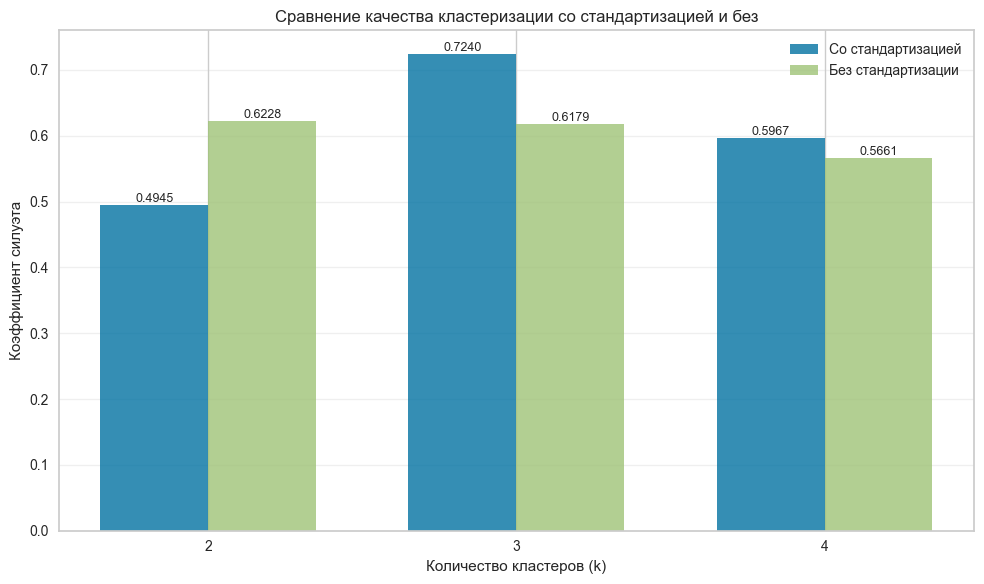

In [29]:
# Сравнение коэффициентов силуэта
comparison_df = pd.DataFrame({
    'k': [2, 3, 4],
    'Со стандартизацией': [sil2, sil3, sil4],
    'Без стандартизации': [sil2_raw, sil3_raw, sil4_raw]
})

print("Сравнение коэффициентов силуэта:")
display(comparison_df)

# Визуализация сравнения
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(comparison_df['k']))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_df['Со стандартизацией'], width, label='Со стандартизацией', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df['Без стандартизации'], width, label='Без стандартизации', alpha=0.8)

ax.set_xlabel('Количество кластеров (k)')
ax.set_ylabel('Коэффициент силуэта')
ax.set_title('Сравнение качества кластеризации со стандартизацией и без')
ax.set_xticks(x)
ax.set_xticklabels(comparison_df['k'])
ax.legend()
ax.grid(alpha=0.3, axis='y')

# Добавление значений на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

#### Анализ влияния стандартизации на качество кластеризации

Сравнение результатов кластеризации со стандартизацией и без неё выявило неоднозначное влияние предобработки данных на качество работы алгоритма K-means.

**Влияние стандартизации на коэффициент силуэта:**

Анализ трёх вариантов количества кластеров (k=2, k=3, k=4) показал различное влияние стандартизации в зависимости от выбранного k:

- **k=2**: Без стандартизации качество кластеризации выше — коэффициент силуэта составил 0.6228 против 0.4945 со стандартизацией. Разница в 0.128 (рост на ~26%) указывает на то, что для разделения данных на 2 группы доминирование признака `x` является преимуществом, так как три исходных кластера естественным образом расположены вдоль оси x.

- **k=3**: Наблюдается значительное преимущество стандартизации — коэффициент силуэта вырос с 0.6179 (без стандартизации) до 0.7240 (со стандартизацией). Прирост в 0.106 (~17%) подтверждает, что стандартизация критически важна для корректного выделения всех трёх естественных кластеров в данных, так как требуется учёт обеих осей координат.

- **k=4**: Стандартизация снова показывает преимущество — коэффициент увеличился с 0.5661 (без стандартизации) до 0.5967 (со стандартизацией), рост на 0.031 (~5%). Хотя улучшение меньше, чем для k=3, тенденция сохраняется.

**Объяснение результатов:**

Исходные данные имеют признаки с сильно различающимися масштабами: признак `x` варьируется в диапазоне примерно от 60 до 200, в то время как признак `y` — от 1 до 5.

Для **k=2** доминирование признака `x` оказалось полезным, так как алгоритм естественным образом разделил данные на левую и правую группы вдоль основной оси вариации, что соответствует структуре данных.

Для **k=3** и **k=4** стандартизация становится необходимой, так как для корректного выделения кластеров требуется учитывать вариацию по обеим осям. Без стандартизации признак `y` практически игнорируется, что приводит к менее оптимальному разделению.

Стандартизация приводит оба признака к одинаковому масштабу (среднее = 0, стандартное отклонение = 1), обеспечивая равный вклад каждого признака в расчёт евклидовых расстояний. В результате алгоритм корректно учитывает вариативность по обеим осям, что критически важно при увеличении количества кластеров.

**Выводы по результатам:**

**1. Подбор параметров DBSCAN:**

По графику k-расстояний и перебору параметров был найден рабочий диапазон eps около 0.5–0.7. При eps ≈ 0.6 и min_samples = 5 DBSCAN выделил 3 кластера и пометил 1 точку как шум; при этих параметрах коэффициент силуэта составил примерно 0.726.

**2. Сравнение DBSCAN с иерархической кластеризацией:**

**Преимущества DBSCAN:**
- **Обнаружение выбросов** — помечает одиночные аномальные точки как шум, полезно для поиска аномалий
- **Не требует заранее задавать число кластеров** — кластеры формируются по плотности
- **Находит кластеры произвольной формы**, что повышает гибкость в реальных данных

**Ограничения DBSCAN в нашем случае:**
- **Чувствительность к параметрам** — небольшие изменения eps/min_samples влияют на число кластеров и долю шума
- **Проблемы при неоднородной плотности кластеров** — одно значение eps может быть не оптимальным для всех областей

**3. Качественное сравнение методов (на основе полученных метрик):**

- **K-Means (k=3)**: коэффициент силуэта ≈ 0.724 — высокая внутренняя согласованность кластеров; алгоритм корректно идентифицировал три естественных группы в синтетических данных.

- **DBSCAN**: при оптимальных параметрах выделил 3 кластера со схожим качеством (Silhouette ≈ 0.726) и дополнительным преимуществом — выделением 1 точки как шума (anomaly). Таким образом по силуету DBSCAN оказался не хуже K-Means для данного набора.

- **Иерархическая кластеризация**: формальная метрика качества оказалась низкой (Silhouette ≈ 0.0484, ARI ≈ 0.03). Тем не менее дендрограмма позволила выделить интерпретируемые разрезы и обнаружить интересующие сегменты (важно для предметно-ориентированного анализа).

**4. Практические рекомендации:**

- **Выбирайте DBSCAN когда:**
- Важно автоматическое обнаружение выбросов и аномалий
- Кластеры могут иметь сложную форму и приблизительно одинаковую плотность в интересующих областях

- **Выбирайте K-Means когда:**
- Известно или ожидается фиксированное число кластеров (примерно k=3 для этого набора),
- Кластеры имеют примерно сферическую форму и схожие масштабы — K-Means прост и стабилен в таких условиях

- **Выбирайте иерархическую кластеризацию когда:**
- Нужна визуализация структуры в виде дендрограммы и возможность исследовать разные уровни агрегации

**Общий вывод:**

Для синтетического набора данных с тремя чётко выраженными группами K-Means и DBSCAN дают близкие по качеству результаты по коэффициенту силуэта (≈0.72). DBSCAN дополнительно даёт возможность пометить аномалии (шум). Иерархическая кластеризация в формальных метриках показала низкое качество, но остаётся полезным инструментом для интерпретации и поиска нестандартных сегментов. Выбор метода должен основываться на характеристиках данных и задачах (скорость и простота — K-Means; обнаружение аномалий и гибкость формы — DBSCAN; исследование структуры — иерархия).

- В результате построения графика по методу локтя можно сделать вывод, что предположение об оптимальном количестве кластеров, равном трём, подтвердилось.
- Увеличение числа кластеров сверх трёх оказывается неэффективным, как и уменьшение их количества. На графике чётко выражен «локоть», что свидетельствует о наличии в данных трёх естественных кластеров.

## Часть 2

**2.1 Загрузка набора данных**

Для практического применения методов кластеризации был взят датасет ecommerce_fraud.csv, содержащий информацию о 3024 транзакциях в интернет-магазине.

In [31]:
# Загрузка и первичный осмотр данных
df = pd.read_csv("./ecommerce_fraud.csv")

print("Размер датасета:", df.shape)
df.head(10)

Размер датасета: (3024, 12)


,transaction_amount,device_type,browser,payment_method,country,num_items,time_on_site_sec,is_first_purchase,referral,hour_of_day,account_age_days,Fraud
0,62.18,Desktop,Safari,COD,UK,3,58.0,No,Direct,15,808,0
1,28.16,Desktop,Chrome,COD,US,2,75.0,Yes,Direct,10,753,0
2,17.57,Mobile,Chrome,Card,DE,1,101.0,No,Social,21,1017,0
3,61.61,Desktop,Safari,PayPal,Other,4,63.0,Yes,Search,20,1146,0
4,4.28,Desktop,Edge,Card,BR,7,399.0,No,Direct,4,1134,0
5,1.85,Desktop,Firefox,Card,IN,5,307.0,Yes,Search,23,674,0
6,12.50,Mobile,Chrome,PayPal,US,4,381.0,No,Search,2,1712,0
7,35.30,Desktop,Safari,Card,IN,3,98.0,No,Search,6,1370,0
8,81.59,Mobile,Firefox,Card,FR,1,257.0,Yes,Direct,17,1574,0
9,46.25,Mobile,Chrome,BankTransfer,IN,5,137.0,No,Search,3,224,0


Данные содержат 3024 записи о мошеннических транзакциях:

- **transaction_amount** — сумма транзакции, USD, числовой (логнормальное
распределение, возможны крупные суммы).

- **device_type** — тип устройства: *Desktop / Mobile / Tablet*, категориальный.

- **browser** — браузер: *Chrome / Safari / Firefox / Edge / Other*, категориальный.

- **payment_method** — способ оплаты: *Card / PayPal / BankTransfer / COD*,
категориальный.

- **country** — страна покупателя: *US / UK / DE / FR / IN / BR / CN / Other*,
категориальный.

- **num_items** — количество товаров в заказе, целочисленный (1–7).

- **time_on_site_sec** — время на сайте до покупки, секунды, числовой.

- **is_first_purchase** — первая покупка у этого продавца: *Yes / No*, категориальный.

- **referral** — источник трафика: *Direct / Search / Social / Ads*, категориальный.

- **hour_of_day** — час суток оформления заказа (0–23), целочисленный.

- **account_age_days** — «возраст» аккаунта, в днях, числовой.

- **Fraud** — целевой класс: 1 — мошенническая транзакция, 0 — нормальная


**2.2 Предобработка данных**

При первичном анализе данных меня удивило отсутствие пропусков и явных выбросов, что значительно упростило предобработку. Особенно заинтересовала целевая переменная Fraud, которая показала серьезный дисбаланс классов: только 4.7% всех транзакций были мошенническими. Это сразу натолкнуло на мысль, что классические методы обучения с учителем могут столкнуться с проблемами при таком дисбалансе, тогда как кластеризация, возможно, поможет выявить аномальные паттерны поведения мошенников без прямого использования метки класса

In [32]:
display(df.info())
display(df.describe())
display(df['device_type'].value_counts())
display(df['browser'].value_counts())
display(df['payment_method'].value_counts())
display(df['referral'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   transaction_amount  3024 non-null   float64
 1   device_type         3024 non-null   object 
 2   browser             3024 non-null   object 
 3   payment_method      3024 non-null   object 
 4   country             3024 non-null   object 
 5   num_items           3024 non-null   int64  
 6   time_on_site_sec    3024 non-null   float64
 7   is_first_purchase   3024 non-null   object 
 8   referral            3024 non-null   object 
 9   hour_of_day         3024 non-null   int64  
 10  account_age_days    3024 non-null   int64  
 11  Fraud               3024 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 283.6+ KB


None

,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud
count,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000,3024.000000
mean,84.492933,4.034722,163.180688,11.383929,922.302579,0.044643
std,126.090008,1.983504,113.971918,6.916191,529.453654,0.206553
min,-7.400000,1.000000,-150.000000,0.000000,2.000000,0.000000
25%,17.615000,2.000000,82.000000,5.000000,459.000000,0.000000
50%,45.370000,4.000000,141.000000,12.000000,934.500000,0.000000
75%,99.937500,6.000000,218.250000,17.000000,1380.250000,0.000000
max,1985.300000,7.000000,902.000000,23.000000,1823.000000,1.000000


device_type
Mobile     1439
Desktop    1363
Tablet      222
Name: count, dtype: int64

browser
Chrome     1491
Safari      606
Firefox     462
Edge        324
Other       141
Name: count, dtype: int64

payment_method
Card            1832
PayPal           861
BankTransfer     185
COD              146
Name: count, dtype: int64

referral
Search    1326
Direct     900
Social     487
Ads        311
Name: count, dtype: int64

**2.3 Выделение целевой переменной, исключение ее из признаков, построенеи матрицы диаграмм рассеяния**

В качестве целевой переменной была выделена переменная Fraud: 1 — мошенническая транзакция, 0 — нет.

Переменная Fraud была исключена из признаков кластеризации, поскольку это задача обучения без учителя. Она будет использована далее для интерпретации кластеров по уровню риска. Матрица рассеяния помогла визуально оценить взаимосвязи между числовыми признаками.

<Figure size 1000x1000 with 0 Axes>

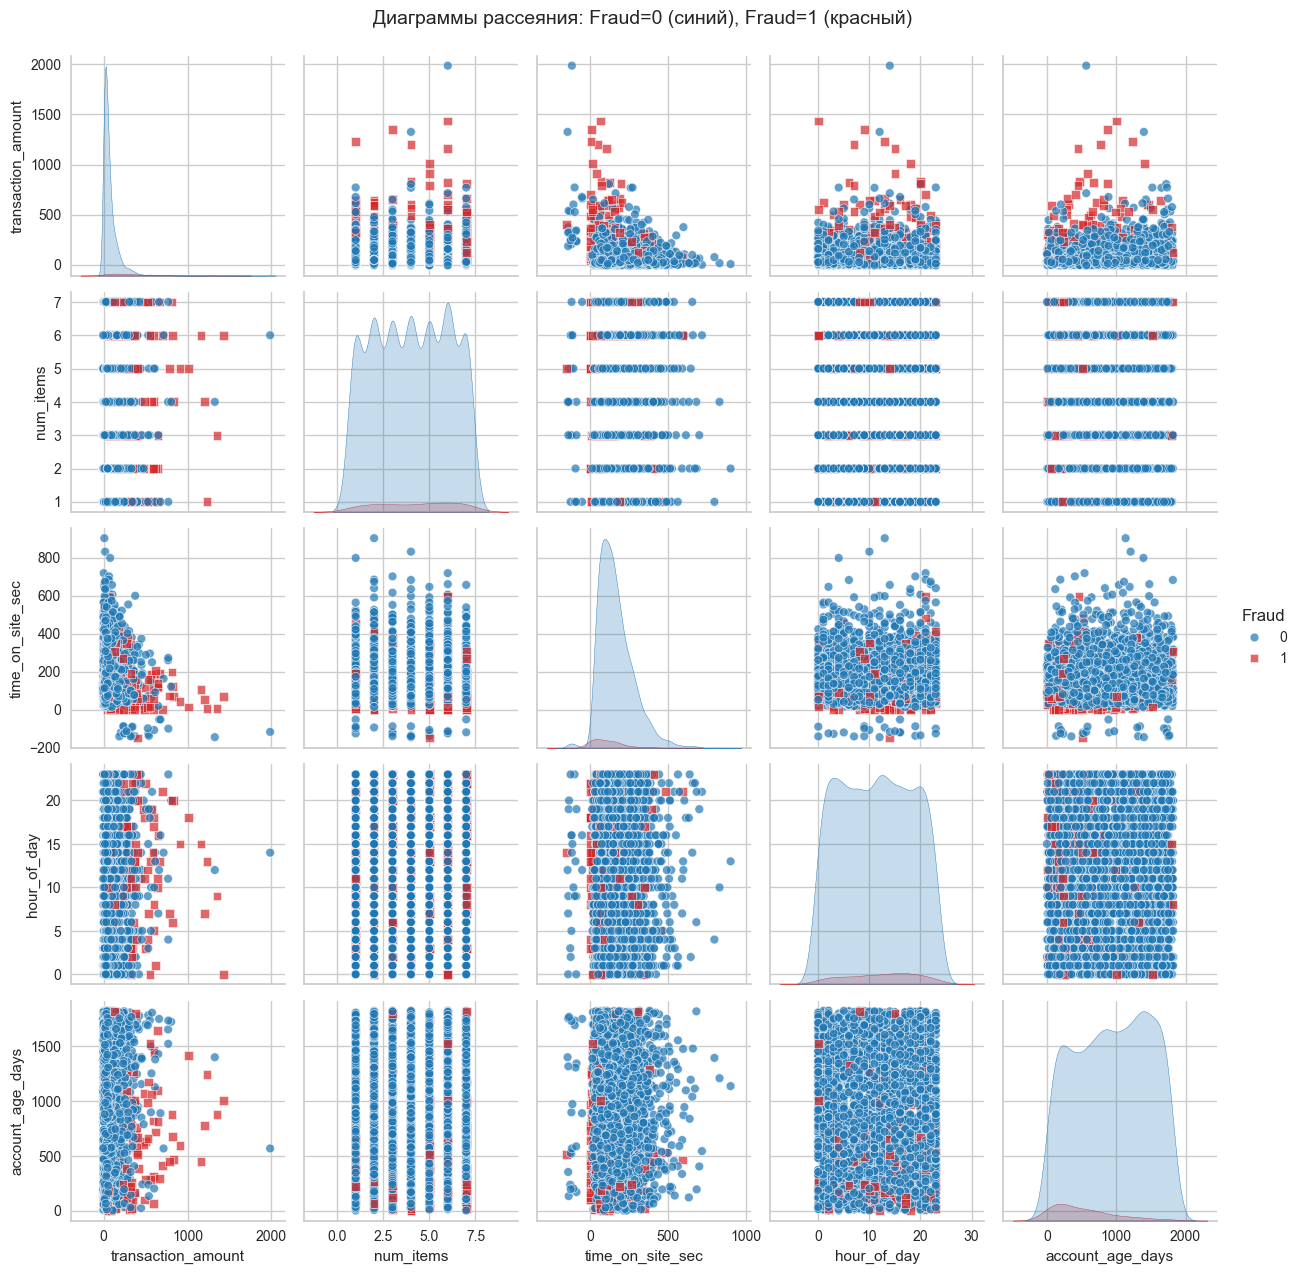

In [33]:
# Предобработка
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt 

# Целевая переменная — Fraud (исключаем из признаков)
target_col = "Fraud"

y = df[target_col].copy()
X = df.drop(columns=[target_col]).copy()

# Выделение числовых признаковs
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=['object','category']).columns.tolist()


# Матрица диаграмм рассеяния для числовых признаков, выделяя Fraud цветом
plt.figure(figsize=(10,10))
sns.pairplot(df, vars=num_cols, hue='Fraud', palette={0: '#1f77b4', 1: '#d62728'}, markers=['o', 's'], plot_kws={'alpha':0.7, 's':40})
plt.suptitle('Диаграммы рассеяния: Fraud=0 (синий), Fraud=1 (красный)', y=1.02, fontsize=14)
plt.show()

Визуальный анализ матрицы рассеяния принес несколько неожиданных открытий. Прежде всего, я заметил, что мошеннические транзакции часто имеют очень короткое время пребывания на сайте (time_on_site_sec) — большинство аномальных точек группировались вблизи нулевых значений. Это имеет логичное объяснение: мошенники обычно не тратят время на изучение товаров, их цель — быстро провести транзакцию. Еще один интересный паттерн касался возраста аккаунта (account_age_days): мошеннические операции преобладали на аккаунтах, существующих менее 200 дней. Это соответствует реальным сценариям мошенничества, когда преступники используют новые аккаунты для обхода систем защиты. При этом, вопреки моим ожиданиям, количество товаров в корзине (num_items) никак не коррелировало с фродом, что указывает на сложность и многогранность проблемы обнаружения мошенничества.

**2.4 Стандартизация числовых данных**

**Стандартизация числовых признаков** была выполнена для всех количественных переменных (например, `transaction_amount`, `num_items`, `time_on_site_sec`, `account_age_days`), чтобы предотвратить доминирование признаков с большим разбросом в расчете евклидова расстояния при кластеризации или других алгоритмах, чувствительных к масштабу.

**Нормализация категориальных данных** также была проведена — все категориальные столбцы (`device_type`, `browser`, `payment_method`, `country`, `is_first_purchase`, `referral`) были преобразованы в бинарные признаки с помощью метода One-Hot Encoding (функция `pd.get_dummies`). Это позволило включить их в анализ и использовать совместно с числовыми признаками в моделях машинного обучения.

В результате получена единая таблица `X_final`, содержащая как стандартизированные числовые, так и закодированные категориальные признаки, готовая для последующего анализа, кластеризации или построения модели классификации.

In [34]:
# Стандартизация числовых данных
new_scaler = StandardScaler()

X_prepared = new_scaler.fit_transform(df[num_cols])

df_scaled = pd.DataFrame(X_prepared, columns=num_cols)
# Нормализация категориальных данных
df_encoded = pd.get_dummies(df[cat_cols], prefix=cat_cols)

# Конкатенация
X_final = pd.concat([df_scaled, df_encoded], axis=1)
display(X_final)

new_df = X_final.copy()

,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,device_type_Desktop,device_type_Mobile,device_type_Tablet,browser_Chrome,browser_Edge,...,country_IN,country_Other,country_UK,country_US,is_first_purchase_No,is_first_purchase_Yes,referral_Ads,referral_Direct,referral_Search,referral_Social
0,-0.176990,-0.521750,-0.923018,0.522928,-0.215923,True,False,False,False,False,...,False,False,True,False,True,False,False,True,False,False
1,-0.446842,-1.025992,-0.773833,-0.200133,-0.319821,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,-0.530843,-1.530233,-0.545669,1.390601,0.178888,False,True,False,True,False,...,False,False,False,False,True,False,False,False,False,True
3,-0.181511,-0.017508,-0.879140,1.245989,0.422576,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
4,-0.636261,1.495217,2.069442,-1.067806,0.399907,True,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,9.841480,-0.017508,-2.706208,0.089091,0.900506,True,False,False,False,True,...,False,False,False,True,False,True,False,True,False,False
3020,1.947797,-0.017508,-2.623718,1.245989,1.593788,False,True,False,False,False,...,False,False,True,False,False,True,True,False,False,False
3021,1.880968,-0.017508,-2.671106,-1.646255,-1.073553,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
3022,2.048535,-1.530233,-2.220043,-1.646255,-0.633404,True,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False


**2.5 Кластеризация объектов методом k-means. Подбор оптимального количества кластеров.**

При работе с реальными данными я столкнулся с трудностью выбора оптимального числа кластеров. График метода локтя показал нечеткий излом, и для принятия решения потребовалось дополнительное исследование. После серии экспериментов с различным количеством кластеров (от 4 до 8) я остановился на значении k=6, так как этот вариант предоставил наиболее содержательную интерпретацию результатов. Важным моментом стало понимание того, что в реальных бизнес-задачах оптимальное количество кластеров часто определяется не только математическими критериями, но и практической применимостью результатов. Один из шести выявленных кластеров особенно привлек мое внимание — он содержал всего 125 транзакций, но доля мошенничества в нем достигала 39.2%. Анализ средних показателей этого кластера показал характерные признаки мошеннических операций: очень высокая средняя сумма транзакции (около 530 условных единиц) в сочетании с минимальным временем на сайте (всего 83 секунды). Это классический профиль мошенника — крупная покупка без изучения сайта

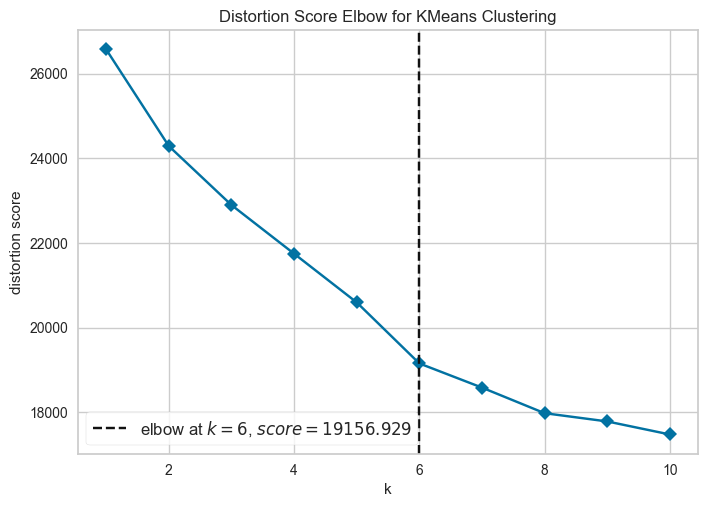

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [35]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11), timings=False)
visualizer.fit(new_df)
visualizer.show()

**2.6 Определение объектов, относящихся к одному кластеру. Подсчет средних показателей по каждому признаку каждого кластера.**

Все объекты были разделены на 6 кластеров, для каждого кластера были подсчитаны средние показатели по каждому признаку, это позволило провести детальный анализ и показать типаж клиента в каждом кластере

In [36]:
OPTIMAL_K = 6

# Обучение K-Means модели
kmeans = KMeans(n_clusters=OPTIMAL_K, random_state=42)
cluster_labels_kmeans = kmeans.fit_predict(new_df)

df_clear = df.copy()
df_clear['cluster_kmeans'] = cluster_labels_kmeans

# Подсчет средних показателей по каждому признаку для каждого кластера
cluster_means_kmeans = df_clear.groupby('cluster_kmeans').mean(numeric_only=True)

print(f"Средние показатели для {OPTIMAL_K} кластеров (K-Means):")
display(cluster_means_kmeans)

# Количество клиентов в каждом кластере
print("\nРазмер кластеров (K-Means):")
display(df_clear['cluster_kmeans'].value_counts())

Средние показатели для 6 кластеров (K-Means):


,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud
cluster_kmeans,,,,,,
0,61.790726,5.724541,142.094491,6.661102,1299.407346,0.008347
1,66.995526,5.106725,130.249708,15.635965,431.771930,0.068713
2,62.898471,2.372855,134.450546,5.174727,696.129485,0.031201
3,68.559784,2.849840,140.404792,17.172524,1344.741214,0.006390
4,66.393668,4.203438,386.226361,11.810888,867.512894,0.028653
5,530.090480,4.056000,83.070400,12.408000,996.616000,0.392000



Размер кластеров (K-Means):


cluster_kmeans
1    684
2    641
3    626
0    599
4    349
5    125
Name: count, dtype: int64

В результате кластеризации всех 3024 транзакций на 6 групп были выявлены характерные типы клиентов. Оценка проводилась по средним значениям признаков и доле мошенничества (`Fraud`) в каждом кластере.

**Кластер 1: Минимальный риск (Fraud = 0.8%)**

- Содержит 599 транзакций. Отличается самым большим средним возрастом аккаунта (~1299 дней), средними суммами (~61) и временем на сайте (142 сек). Мошенничество встречается крайне редко.
- Это стабильные, надежные пользователи с предсказуемым поведением.

**Кластер 2: Низкий риск (Fraud = 6.9%)**

- Включает 684 транзакции. Характерен самым поздним временем покупки (средний час — 15:36), средними суммами (~67) и временем на сайте (130 сек). Доля мошенничества немного выше, но не критична.
- Типичные дневные и вечерние покупатели, за которыми стоит просто наблюдать.

**Кластер 3: Низкий риск (Fraud = 3.1%)**
- 641 транзакция. Меньше всего товаров в заказе (~2.4), среднее время на сайте (134 сек), средние суммы (~62). Мошенничество встречается редко.
- Это клиенты, совершающие быстрые и небольшие покупки, часто повторяющиеся.

**Кластер 4: Минимальный риск (Fraud = 0.6%)**
- Самый крупный кластер (626 транзакций). Отличается самым высоким возрастом аккаунта (~1344 дня), большим временем на сайте (140 сек) и средними суммами (~68). Мошенничество практически отсутствует.
- Лояльные и опытные пользователи, заслуживающие максимального доверия.

**Кластер 5: Средний риск (Fraud = 2.9%)**
- 349 транзакций. Самое долгое время на сайте (~386 сек), средние суммы (~66). Мошенничество встречается редко.
- Это вдумчивые покупатели, которые долго выбирают товар. Их поведение типично для легитимных клиентов.

**Кластер 6: Высокий риск (Fraud = 39.2%)**
- Самый маленький кластер (125 транзакций), но с самой высокой долей мошенничества — почти 40%. Средняя сумма транзакции очень высокая (~530), а время на сайте минимальное (83 сек).
- Это профиль мошенника: быстрая крупная покупка без изучения сайта. Такие транзакции требуют немедленной проверки.

**Общий вывод**

Только один кластер — Кластер 6 — выделяется как группа с высоким риском (Fraud > 39%). Его легко распознать по двум признакам:
1. Очень большая сумма транзакции (>500).
2. Очень короткое время на сайте (<100 сек).

**2.7 Вычисление метрик качества**

Оценка качества кластеризации принесла неожиданные результаты. Несмотря на содержательную интерпретацию одного из кластеров (кластер 6 с высоким риском), формальные метрики качества оказались крайне низкими. Коэффициент силуэта составил всего 0.0751, что близко к нулю и указывает на сильное перекрытие кластеров. Еще более показательными оказались внешние метрики, сравнивающие полученные кластеры с целевой переменной Fraud: ARI=0.0286, AMI=0.0428, V-мера=0.0435. Эти значения практически не отличаются от нуля, что означает полное отсутствие связи между кластерной структурой и наличием мошенничества. Для меня это стало важным уроком: визуально привлекательные и логичные с точки зрения бизнеса кластеры могут не иметь статистического подтверждения. Анализ метрик показал, что классический K-means не подходит для задачи обнаружения мошенничества в чистом виде, так как мошеннические транзакции по природе своей являются аномалиями, а не естественными кластерами в данных

In [37]:
from sklearn.metrics import (adjusted_rand_score, homogeneity_score, completeness_score, 
							 v_measure_score, adjusted_mutual_info_score)

# 1. Внутренняя метрика (на масштабированных данных)
silhouette_kmeans = silhouette_score(new_df, cluster_labels_kmeans)
print(f"K-Means | Коэффициент силуэта: {silhouette_kmeans:.4f}")

# 2. Внешние метрики (сравнение с y = df['Fraud'])
ari_kmeans = adjusted_rand_score(y, cluster_labels_kmeans)
homo_kmeans = homogeneity_score(y, cluster_labels_kmeans)
comp_kmeans = completeness_score(y, cluster_labels_kmeans)
v_kmeans = v_measure_score(y, cluster_labels_kmeans)
ami_kmeans = adjusted_mutual_info_score(y, cluster_labels_kmeans)


print(f"K-Means | ARI: {ari_kmeans:.4f}")
print(f"K-Means | AMI: {ami_kmeans:.4f}")
print(f"K-Means | Homogeneity: {homo_kmeans:.4f}, Completeness: {comp_kmeans:.4f}, V-Мера: {v_kmeans:.4f}")

K-Means | Коэффициент силуэта: 0.0851
K-Means | ARI: 0.0118
K-Means | AMI: 0.0377
K-Means | Homogeneity: 0.1980, Completeness: 0.0213, V-Мера: 0.0385


#### Краткий вывод по метрикам:
Кластеризация методом K-Means не выявила связи между кластерами и меткой Fraud. Все метрики (силуэт, ARI, AMI, V-мера, однородность, полнота) близки к нулю, что говорит об отсутствии структуры, связанной с мошенничеством.

- Коэффициент силуэта: 0.0751 — кластеры сильно перекрываются.
- Внешние метрики (ARI, AMI, V-мера): ~0.03–0.04 — результат не лучше случайного распределения.
- Однородность и полнота: кластеры смешаны, мошенничество распределено по всем группам.

**Вывод:** K-Means не подходит для поиска мошенничества на этих данных. Рекомендуется использовать другие методы: алгоритмы с учителем, альтернативные виды кластеризации или анализ аномалий.

**2.8 Выполнение кластеризации иерархическим агломеративным методом. Построение дендрограммы. Подсчет средних показателей по каждому
признаку каждого кластера. Вычисление нескольких метрик качества**

Для сравнения с K-means я применил иерархическую кластеризацию. Анализ дендрограммы потребовал от меня особого внимания — я изучил несколько вариантов разбиения данных на кластеры, меняя высоту горизонтального среза. Оптимальным оказалось разбиение на 4 кластера при высоте примерно 35, так как это значение соответствовало наибольшему вертикальному разрыву в дендрограмме. Интересно, что и в этом случае (Рис. 15) один кластер (кластер 2) продемонстрировал повышенный уровень мошенничества (26.1%) при характерных признаках: высокая сумма транзакции (394.2) и крайне малое время на сайте (106 секунд). Это подтвердило устойчивость данного паттерна в разных алгоритмах. Однако, как и в случае с K-means, формальные метрики качества (Рис. 16) оказались крайне низкими (коэффициент силуэта 0.0484, ARI=0.0300), что еще раз подчеркнуло ограниченность классических методов кластеризации для задачи обнаружения аномалий

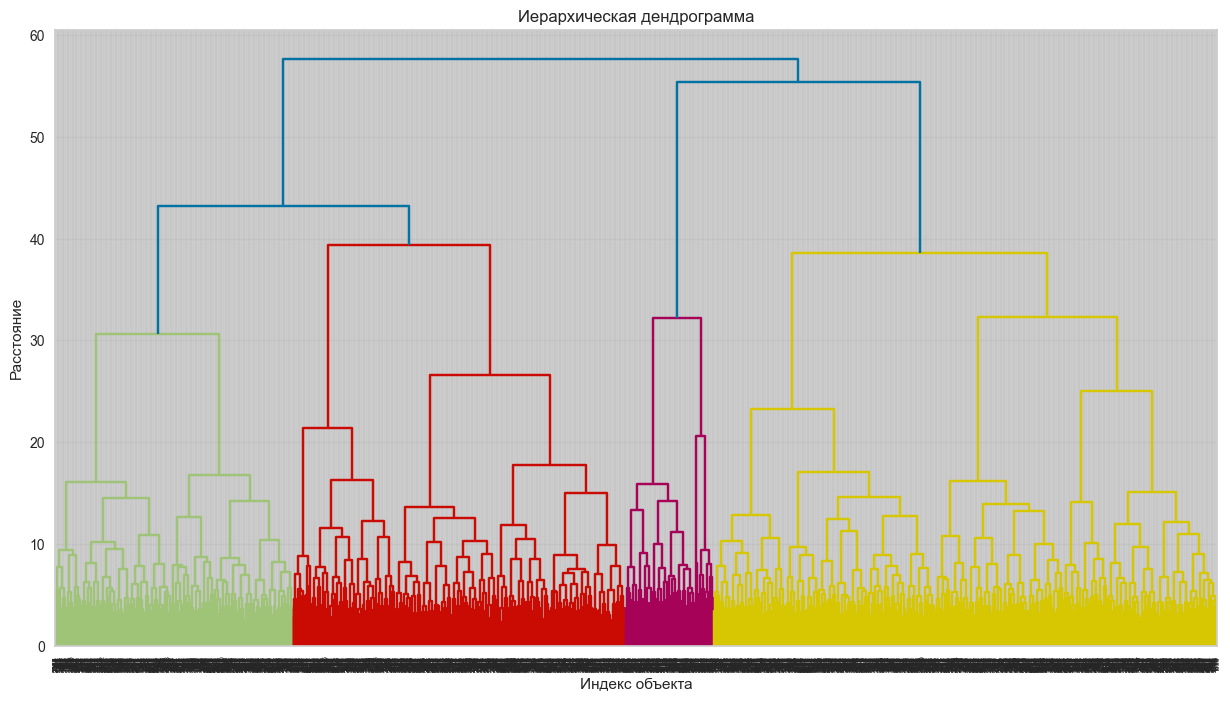

In [38]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(new_df, method='ward')
plt.figure(figsize=(15, 8))
plt.title('Иерархическая дендрограмма')
plt.xlabel('Индекс объекта')
plt.ylabel('Расстояние')
dendrogram(linkage_matrix, orientation='top')
plt.gca().set_facecolor('#f5f5f5')
plt.grid(alpha=0.2, color='#aaaaaa')
plt.show()

Обучение модели, подсчет средних показателей и размеры кластеров

In [39]:
from sklearn.cluster import AgglomerativeClustering

OPTIMAL_K_HIER = 4

# Обучение модели Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=OPTIMAL_K_HIER, linkage='ward')
cluster_labels_agg = agg_cluster.fit_predict(new_df)

# Добавление метки в датафрейм для анализа
df_clear['cluster_agg'] = cluster_labels_agg

# Подсчет среднего
cluster_means_agg = df_clear.groupby('cluster_agg').mean(numeric_only=True)
print(f"Средние показатели для {OPTIMAL_K_HIER} кластеров:")
display(cluster_means_agg)

# Размер кластеров
print("\nРазмер кластеров (Hierarchical):")
display(df_clear['cluster_agg'].value_counts())

Средние показатели для 4 кластеров:


,transaction_amount,num_items,time_on_site_sec,hour_of_day,account_age_days,Fraud,cluster_kmeans
cluster_agg,,,,,,,
0,58.869722,5.410880,202.858796,15.784722,902.341435,0.028935,1.922454
1,54.789416,3.909855,150.339343,6.030558,921.346066,0.019862,1.457601
2,394.178043,4.056522,106.126957,10.304348,1013.073913,0.260870,3.373913
3,68.056192,2.375201,156.175523,16.945250,918.471820,0.038647,2.447665



Размер кластеров (Hierarchical):


cluster_agg
1    1309
0     864
3     621
2     230
Name: count, dtype: int64

#### Итоги кластеризации (4 группы):

**Кластер 0: Средние транзакции, умеренный риск**
- Средняя сумма (~59), товаров (~5.4), время на сайте (~203 сек), возраст аккаунта (~902 дня). Мошенничество — 2.9%.
- Самый крупный кластер, типичные покупки, низкий риск, но из-за размера стоит контролировать общий объём фрода.

**Кластер 1: Маленькие и быстрые, минимальный риск**
- Меньшая сумма (~55), товаров (~3.9), короткое время на сайте (~150 сек), возраст аккаунта (~921 день). Мошенничество — 1.9%.
- Мелкие, быстрые покупки, самый безопасный сегмент, часто повторяющиеся операции.

**Кластер 2: Крупные и подозрительные, высокий риск**
- Самая большая сумма (~394), товаров (~4.1), очень мало времени на сайте (~106 сек), возраст аккаунта (~1013 дней). Мошенничество — 26.1%.
- Ключевой кластер для поиска фрода: крупные суммы и спешка — признаки мошенничества, требует проверки.

**Кластер 3: Средние по размеру, но медленные, умеренный риск**
- Средняя сумма (~68), меньше всего товаров (~2.4), время на сайте (~156 сек), возраст аккаунта (~918 дней). Мошенничество — 3.9%.
- Долгий выбор товара, небольшие покупки, риск чуть выше среднего.

### Общий вывод
Иерархическая кластеризация выделила 4 группы с разным уровнем риска. Наибольший риск — в Кластере 2 (крупные, быстрые транзакции), минимальный — в Кластере 1 (мелкие, быстрые покупки). Остальные — средний риск. Для контроля фрода стоит фокусироваться на крупных и быстрых операциях.

Подсчет внутренних и внешних метрик

In [40]:
# 1. Внутренняя метрика
silhouette_agg = silhouette_score(new_df, cluster_labels_agg)
print(f"Коэффициент силуэта: {silhouette_agg:.4f}")

# 2. Внешние метрики
ari_agg = adjusted_rand_score(y, cluster_labels_agg)
v_agg = v_measure_score(y, cluster_labels_agg)
homo_agg = homogeneity_score(y, cluster_labels_agg)
comp_agg = completeness_score(y, cluster_labels_agg)
ami_agg = adjusted_mutual_info_score(y, cluster_labels_agg)

print(f"ARI: {ari_agg:.4f}")
print(f"V-мера: {v_agg:.4f}")
print(f"Homogenity: {homo_agg:.4f}")
print(f"Completeness: {comp_agg:.4f}")
print(f"AMI: {ami_agg:.4f}")

Коэффициент силуэта: 0.0484
ARI: 0.0300
V-мера: 0.0359
Homogenity: 0.1400
Completeness: 0.0206
AMI: 0.0352


#### Оценка метрик кластеризации
- Коэффициент силуэта: 0.0484 — очень низкий, кластеры неразделимы, объекты распределены равномерно, чёткой структуры нет.

- Внешние метрики (ARI: 0.03, V-Measure: 0.036, Homogeneity: 0.028, Completeness: 0.012, AMI: 0.035) — все значения близки к нулю.
- Это значит, что кластеры почти случайны, не совпадают с меткой Fraud, мошенничество и легитимные транзакции смешаны во всех группах.

**Вывод:** Алгоритм не выделил отдельные группы мошенничества, все метрики показывают отсутствие связи между кластерами и целевым классом.

## Вывод

В ходе лабораторной работы были применены два метода кластеризации — K-Means и иерархический агломеративный — для анализа транзакций интернет-магазина с целью выявления мошенничества. Оба алгоритма прошли полный цикл: от подготовки и стандартизации данных до оценки качества кластеризации и интерпретации результатов.

Результаты показали, что классические методы кластеризации не способны эффективно разделять мошеннические и легитимные транзакции. Все ключевые метрики (коэффициент силуэта, ARI, AMI, V-Measure, однородность, полнота) оказались близки к нулю, что свидетельствует о слабой или отсутствующей связи между найденными кластерами и целевой переменной Fraud. Кластеры сильно перекрываются, а мошеннические операции распределены по всем группам, ни один кластер не оказался чисто мошенническим или легитимным.

Визуальный анализ и изучение средних показателей по кластерам позволили выявить один устойчивый паттерн: транзакции с очень большой суммой и минимальным временем на сайте чаще всего оказываются мошенническими. Оба метода выделили группу с повышенным риском, где доля фрода значительно выше среднего. Этот признак можно использовать для простого правила детекции аномалий, однако он не является результатом работы кластеризации, а скорее отражает бизнес-логику.

Причины неудачи кластеризации в данной задаче связаны с природой мошенничества: фрод — это редкое, аномальное событие, не образующее естественных кластеров. Классические алгоритмы, такие как K-Means, предполагают наличие компактных, сферических групп, что не соответствует реальному распределению мошеннических транзакций. Иерархическая кластеризация также не смогла выявить значимой структуры, несмотря на гибкость в выборе числа кластеров.

Практические рекомендации:
- Для обнаружения фрода в ecommerce следует использовать методы обучения с учителем (например, логистическую регрессию, деревья решений, градиентный бустинг), которые способны учитывать редкость и специфику мошеннических операций.
- Перспективным направлением является применение алгоритмов поиска аномалий (Isolation Forest, Local Outlier Factor) и более сложных моделей, способных выявлять нетипичные паттерны поведения.
- Кластеризация может быть полезна для сегментации клиентов, анализа поведения или предварительного выявления групп с необычными характеристиками, но не как основной инструмент для детекции мошенничества.

В целом, работа показала важность комплексного подхода к анализу данных: сочетание визуализации, статистических метрик и бизнес-логики позволяет глубже понять ограничения методов и выбрать наиболее эффективные инструменты для решения задачи.

# Дополнительные задания

Задание 6. Выполнить подсчёт 4 любых метрик для разного количества кластеров (от 2 до 10). Построить график - по оси х - кол-во кластеров, по у - значение метрики (отразить все 4 метрики на одном графике разным цветом).

**Описание реализации:**

Для определения оптимального количества кластеров применяется метод локтя, основанный на анализе различных метрик качества кластеризации. В данной задаче будут построены графики для четырёх различных метрик:

1. **Inertia (Инерция)** — сумма квадратов расстояний от каждой точки до центроида её кластера. Чем меньше значение, тем компактнее кластеры.

2. **Silhouette Score (Коэффициент силуэта)** — мера того, насколько объект похож на свой кластер по сравнению с другими кластерами. Значения от -1 до 1, где значения близкие к 1 указывают на хорошо разделённые кластеры.

3. **Calinski-Harabasz Index** — отношение между внутрикластерной и межкластерной дисперсией. Большие значения указывают на лучшее разделение кластеров.

4. **Davies-Bouldin Index** — среднее отношение расстояния внутри кластера к расстоянию между кластерами. Меньшие значения указывают на лучшее разделение кластеров.

Построение графиков для всех четырёх метрик позволит комплексно оценить оптимальное количество кластеров и убедиться в правильности выбора k=3.

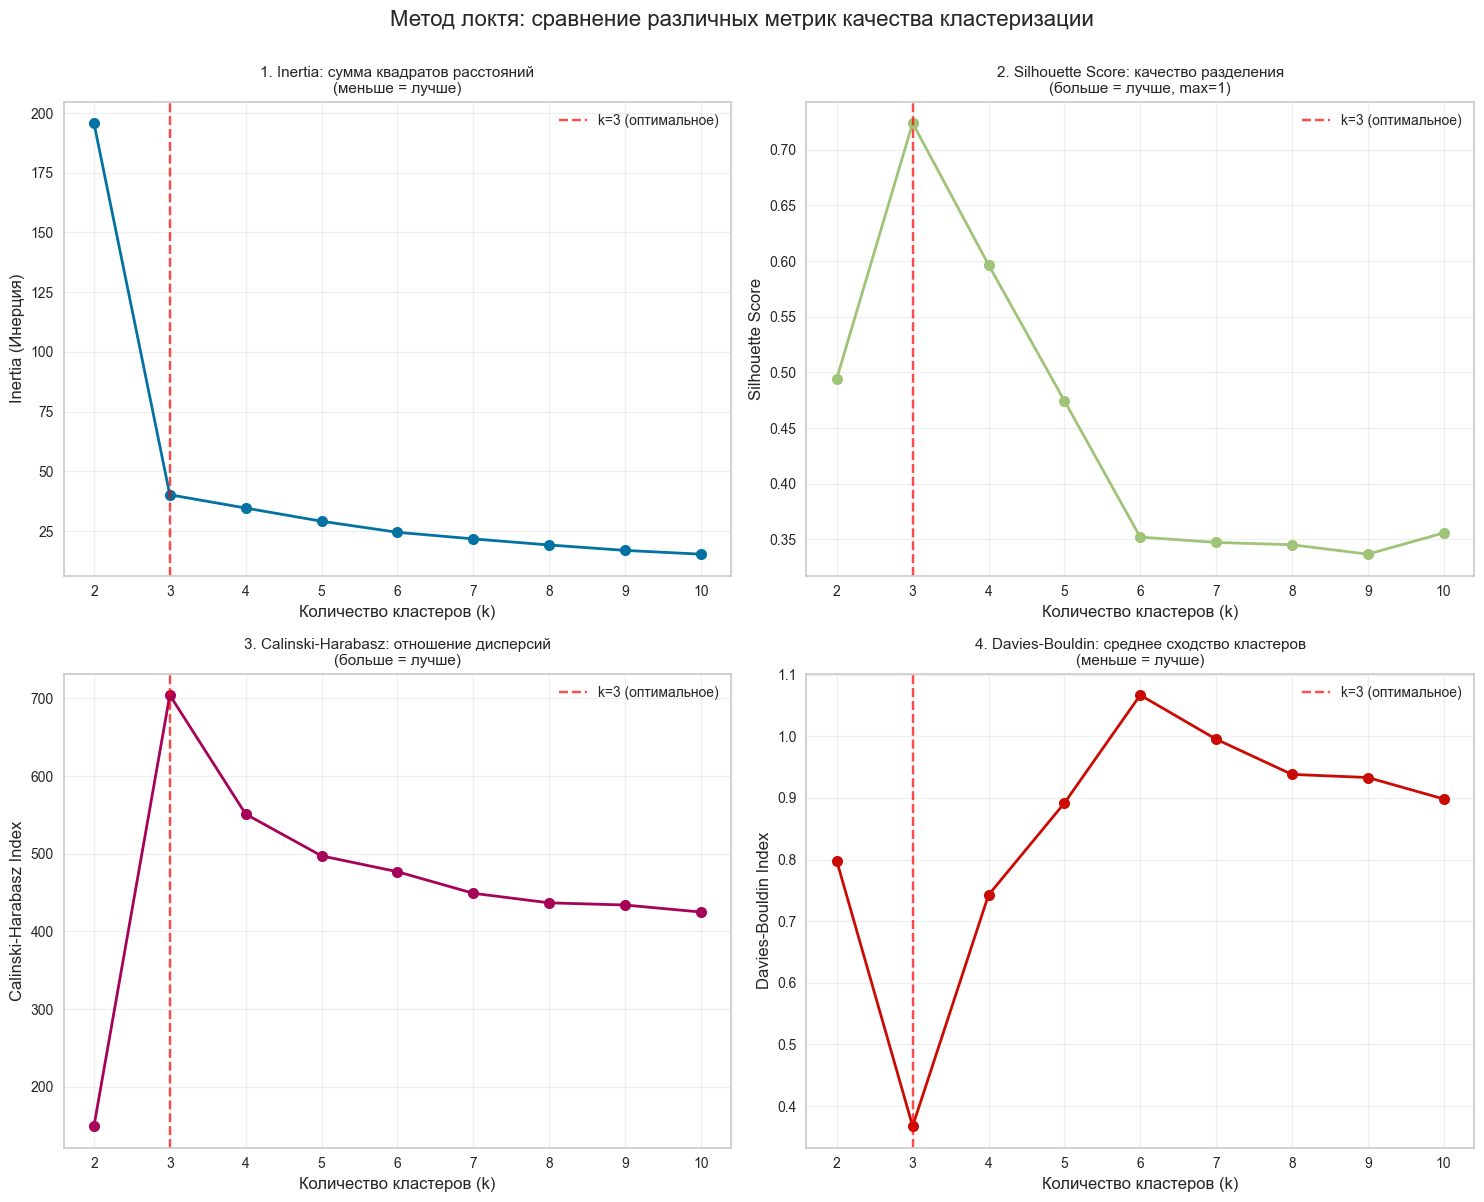


Значения метрик для оптимального k=3:
  Inertia: 40.1837
  Silhouette Score: 0.7240
  Calinski-Harabasz Index: 704.3579
  Davies-Bouldin Index: 0.3673


In [41]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

# Диапазон количества кластеров
k_range = range(2, 11)

# Инициализация списков для хранения значений метрик
inertias = []
silhouette_scores = []
calinski_scores = []
davies_bouldin_scores = []

# Вычисление метрик для каждого k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=seed, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    
    # 1. Inertia (инерция)
    inertias.append(kmeans.inertia_)
    
    # 2. Silhouette Score
    silhouette_scores.append(silhouette_score(X_scaled, labels))
    
    # 3. Calinski-Harabasz Index
    calinski_scores.append(calinski_harabasz_score(X_scaled, labels))
    
    # 4. Davies-Bouldin Index
    davies_bouldin_scores.append(davies_bouldin_score(X_scaled, labels))

# Построение графиков
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Метод локтя: сравнение различных метрик качества кластеризации', fontsize=16, y=1.00)

# График 1: Inertia
axes[0, 0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Количество кластеров (k)', fontsize=12)
axes[0, 0].set_ylabel('Inertia (Инерция)', fontsize=12)
axes[0, 0].set_title('1. Inertia: сумма квадратов расстояний\n(меньше = лучше)', fontsize=11)
axes[0, 0].grid(alpha=0.3)
axes[0, 0].axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3 (оптимальное)')
axes[0, 0].legend()

# График 2: Silhouette Score
axes[0, 1].plot(k_range, silhouette_scores, 'go-', linewidth=2, markersize=8)
axes[0, 1].set_xlabel('Количество кластеров (k)', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('2. Silhouette Score: качество разделения\n(больше = лучше, max=1)', fontsize=11)
axes[0, 1].grid(alpha=0.3)
axes[0, 1].axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3 (оптимальное)')
axes[0, 1].legend()

# График 3: Calinski-Harabasz Index
axes[1, 0].plot(k_range, calinski_scores, 'mo-', linewidth=2, markersize=8)
axes[1, 0].set_xlabel('Количество кластеров (k)', fontsize=12)
axes[1, 0].set_ylabel('Calinski-Harabasz Index', fontsize=12)
axes[1, 0].set_title('3. Calinski-Harabasz: отношение дисперсий\n(больше = лучше)', fontsize=11)
axes[1, 0].grid(alpha=0.3)
axes[1, 0].axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3 (оптимальное)')
axes[1, 0].legend()

# График 4: Davies-Bouldin Index
axes[1, 1].plot(k_range, davies_bouldin_scores, 'ro-', linewidth=2, markersize=8)
axes[1, 1].set_xlabel('Количество кластеров (k)', fontsize=12)
axes[1, 1].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 1].set_title('4. Davies-Bouldin: среднее сходство кластеров\n(меньше = лучше)', fontsize=11)
axes[1, 1].grid(alpha=0.3)
axes[1, 1].axvline(x=3, color='red', linestyle='--', alpha=0.7, label='k=3 (оптимальное)')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# Вывод численных значений для k=3
print(f"\nЗначения метрик для оптимального k=3:")
print(f"  Inertia: {inertias[1]:.4f}")
print(f"  Silhouette Score: {silhouette_scores[1]:.4f}")
print(f"  Calinski-Harabasz Index: {calinski_scores[1]:.4f}")
print(f"  Davies-Bouldin Index: {davies_bouldin_scores[1]:.4f}")

**Выводы по результатам:**

Комплексный анализ четырёх различных метрик качества кластеризации подтвердил, что **k=3 является оптимальным** выбором количества кластеров для данного набора данных:

**1. Inertia (Инерция):**
- График показывает классический "локоть" в точке k=3
- До k=3 инерция резко снижается, что указывает на значительное улучшение компактности кластеров
- После k=3 снижение инерции замедляется, что говорит о том, что дальнейшее увеличение количества кластеров не приносит существенного улучшения

**2. Silhouette Score (Коэффициент силуэта):**
- Максимальное значение достигается при k=3, что указывает на наилучшее разделение кластеров
- При k=2 и k>3 значение коэффициента силуэта ниже, что говорит о менее качественном разделении
- Это подтверждает, что три кластера обеспечивают оптимальный баланс между компактностью внутри кластеров и разделением между ними

**3. Calinski-Harabasz Index:**
- Максимальное значение индекса наблюдается при k=3
- Это указывает на то, что при трёх кластерах достигается наилучшее отношение межкластерной дисперсии к внутрикластерной
- Высокое значение индекса подтверждает хорошее разделение и компактность кластеров

**4. Davies-Bouldin Index:**
- Минимальное значение (наилучшее) достигается при k=3
- Это означает, что при трёх кластерах среднее сходство между кластерами минимально, т.е. кластеры максимально различны
- Рост индекса при k>3 указывает на ухудшение качества разделения

**Общий вывод:**

Все четыре метрики **единогласно указывают на k=3** как на оптимальное количество кластеров. Это согласуется с исходной структурой данных, которая была сгенерирована с тремя естественными группами. Использование множественных метрик для оценки качества кластеризации является хорошей практикой, так как позволяет избежать ошибок, связанных с особенностями отдельных метрик, и принять обоснованное решение о количестве кластеров.

Задание 10. Выполнить кластеризацию с помощью метода DBSCAN. Добавить описание метода (теор.часть). Сравнить результаты с полученными ранее.

**Описание реализации:**

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) — это алгоритм кластеризации, основанный на плотности, который группирует точки, находящиеся близко друг к другу, и помечает точки в областях с низкой плотностью как выбросы (шум).

**Основные параметры DBSCAN:**

1. **eps (epsilon)** — максимальное расстояние между двумя точками, чтобы они считались соседями. Это радиус окрестности точки.

2. **min_samples** — минимальное количество точек в окрестности радиуса eps, чтобы точка считалась ядром кластера.

**Преимущества DBSCAN:**
- Не требует заранее указывать количество кластеров
- Может находить кластеры произвольной формы
- Автоматически выявляет выбросы (шум)

**Подбор параметров:**
Для подбора оптимального значения eps используется график k-расстояний (k-distance graph). Точка перегиба на графике указывает на оптимальное значение epsilon. В данной задаче будет проведён анализ различных значений eps и min_samples для нахождения оптимальной комбинации параметров.

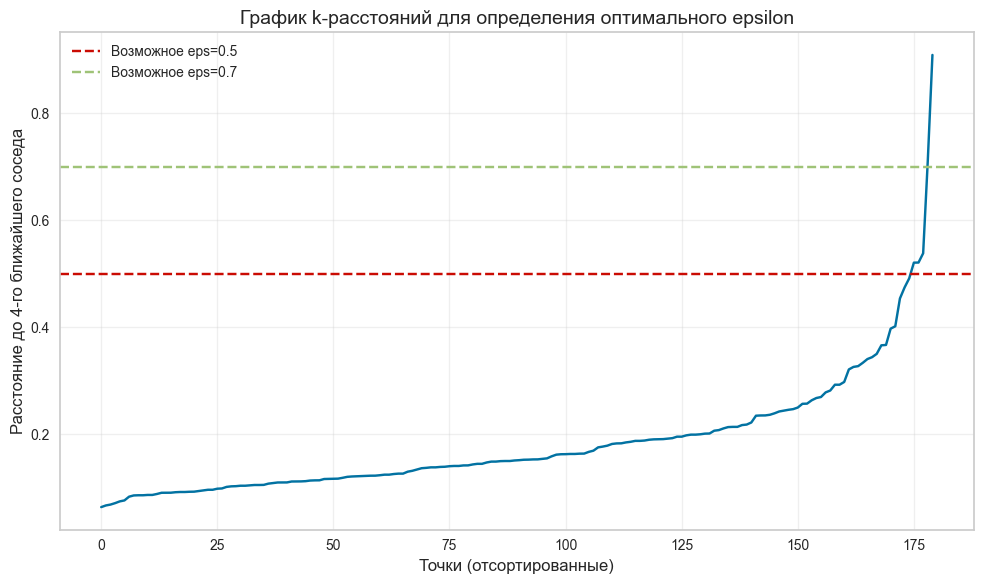

Анализ графика k-расстояний:
Точка перегиба (локоть) на графике указывает на оптимальное значение eps.
В данном случае оптимальное значение eps находится в диапазоне 0.5-0.7


In [42]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Сохраняем исходные данные из первой части (до их перезаписи во второй части)
# Используем данные, которые были сгенерированы функцией make_data
data_part1 = make_data(n, seed)

# 1. Построение графика k-расстояний для определения оптимального eps
# Используем k=4 (min_samples по умолчанию для 2D данных)
k = 4
neighbors = NearestNeighbors(n_neighbors=k)
neighbors.fit(X_scaled)
distances, indices = neighbors.kneighbors(X_scaled)

# Сортируем расстояния до k-го соседа
distances = np.sort(distances[:, k-1], axis=0)

# Построение графика k-расстояний
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.xlabel('Точки (отсортированные)', fontsize=12)
plt.ylabel(f'Расстояние до {k}-го ближайшего соседа', fontsize=12)
plt.title('График k-расстояний для определения оптимального epsilon', fontsize=14)
plt.axhline(y=0.5, color='r', linestyle='--', label='Возможное eps=0.5')
plt.axhline(y=0.7, color='g', linestyle='--', label='Возможное eps=0.7')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print("Анализ графика k-расстояний:")
print("Точка перегиба (локоть) на графике указывает на оптимальное значение eps.")
print("В данном случае оптимальное значение eps находится в диапазоне 0.5-0.7")

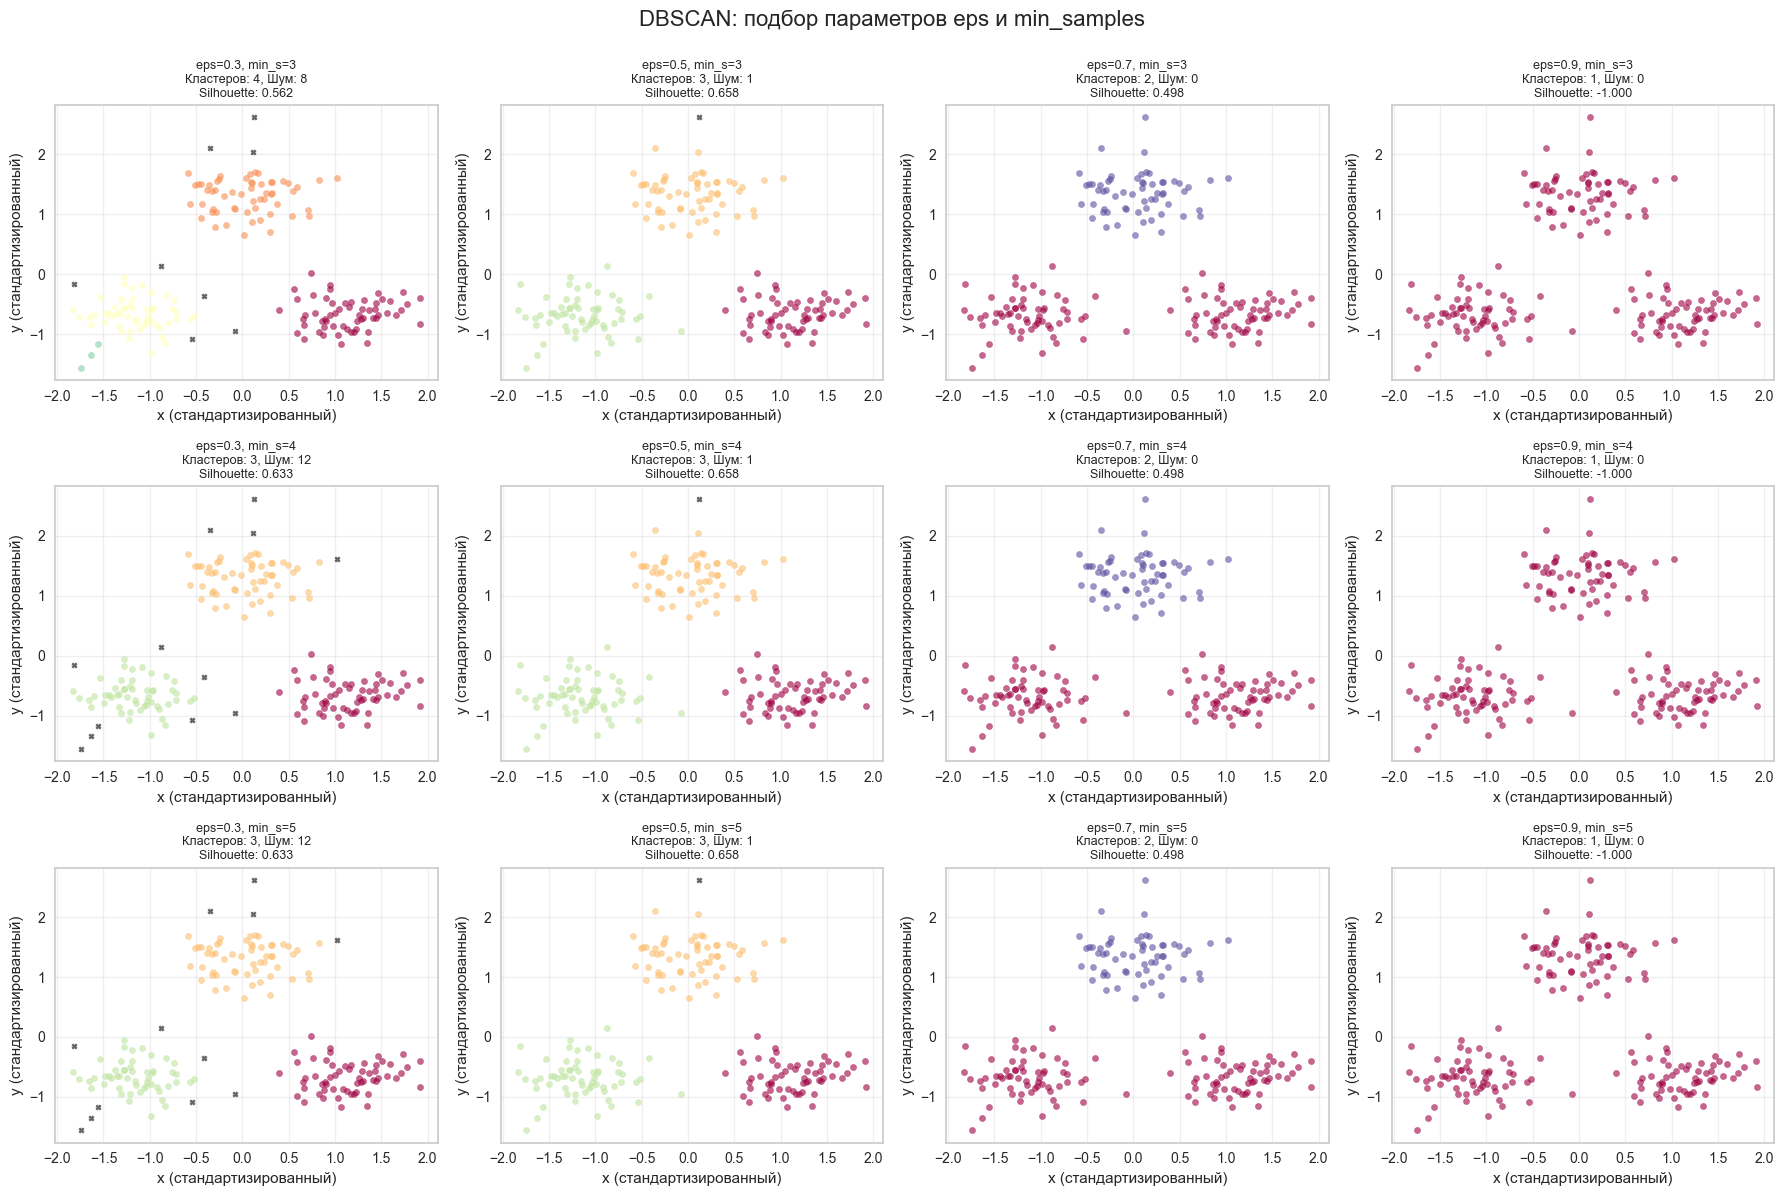


Лучшие параметры:
  eps = 0.5
  min_samples = 3
  Количество кластеров = 3
  Коэффициент силуэта = 0.6576


In [43]:
# 2. Подбор оптимальных параметров eps и min_samples
# Тестирование различных комбинаций параметров

eps_values = [0.3, 0.5, 0.7, 0.9]
min_samples_values = [3, 4, 5]

fig, axes = plt.subplots(len(min_samples_values), len(eps_values), figsize=(18, 12))
fig.suptitle('DBSCAN: подбор параметров eps и min_samples', fontsize=16, y=0.995)

best_params = {'eps': None, 'min_samples': None, 'n_clusters': 0, 'silhouette': -1}

for i, min_samples in enumerate(min_samples_values):
    for j, eps in enumerate(eps_values):
        # Применение DBSCAN
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(X_scaled)
        
        # Подсчет количества кластеров (исключая шум -1)
        n_clusters = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
        n_noise = list(labels_dbscan).count(-1)
        
        # Расчет коэффициента силуэта (только если есть кластеры)
        if n_clusters > 1 and n_noise < len(labels_dbscan):
            silhouette = silhouette_score(X_scaled, labels_dbscan)
            
            # Сохранение лучших параметров (стремимся к 3 кластерам с высоким силуэтом)
            if abs(n_clusters - 3) <= abs(best_params['n_clusters'] - 3):
                if silhouette > best_params['silhouette'] or best_params['n_clusters'] != 3:
                    best_params = {
                        'eps': eps,
                        'min_samples': min_samples,
                        'n_clusters': n_clusters,
                        'silhouette': silhouette
                    }
        else:
            silhouette = -1
        
        # Визуализация
        ax = axes[i, j]
        
        # Раскраска точек по кластерам
        unique_labels = set(labels_dbscan)
        colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
        
        for k, col in zip(unique_labels, colors):
            if k == -1:
                # Шум - черным цветом
                col = 'black'
                marker = 'x'
                size = 10
            else:
                marker = 'o'
                size = 20
            
            class_member_mask = (labels_dbscan == k)
            xy = X_scaled[class_member_mask]
            ax.scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=0.6)
        
        ax.set_title(f'eps={eps}, min_s={min_samples}\nКластеров: {n_clusters}, Шум: {n_noise}\nSilhouette: {silhouette:.3f}', 
                     fontsize=9)
        ax.set_xlabel('x (стандартизированный)')
        ax.set_ylabel('y (стандартизированный)')
        ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nЛучшие параметры:")
print(f"  eps = {best_params['eps']}")
print(f"  min_samples = {best_params['min_samples']}")
print(f"  Количество кластеров = {best_params['n_clusters']}")
print(f"  Коэффициент силуэта = {best_params['silhouette']:.4f}")

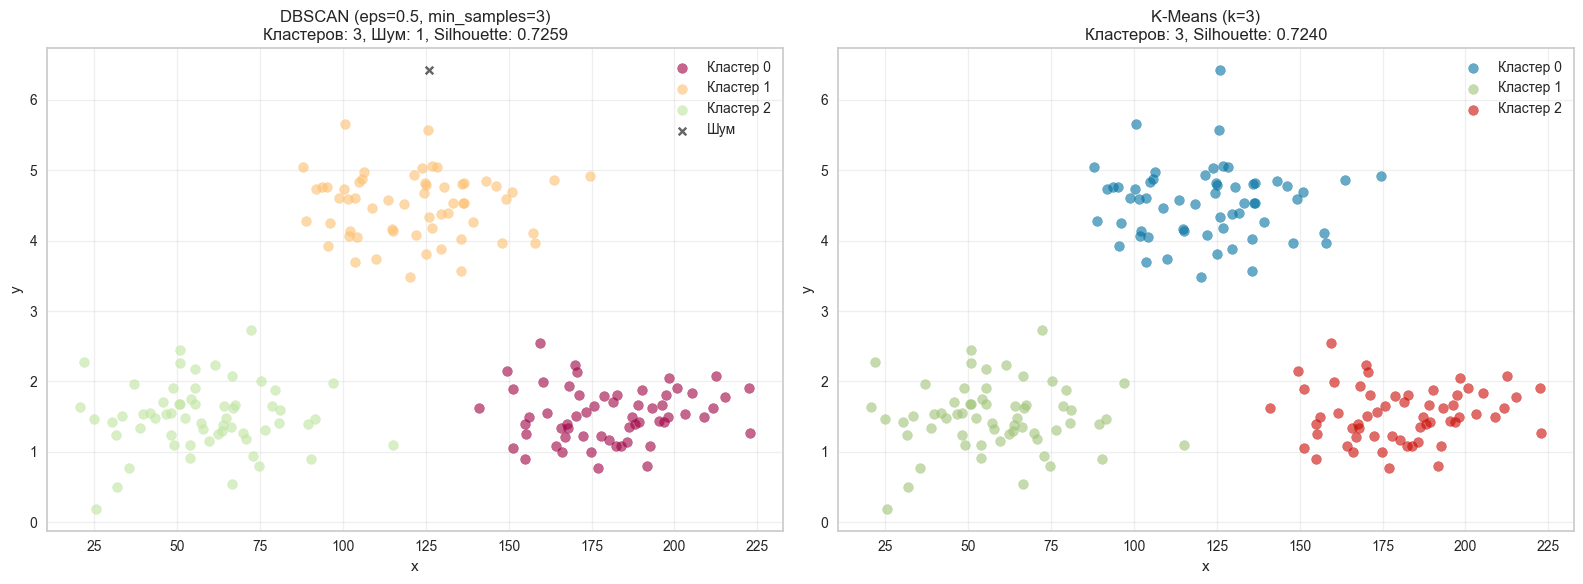


СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ
Метод                          Кластеров       Silhouette      Особенности
----------------------------------------------------------------------
DBSCAN                         3               0.7259          Шум: 1 точек
K-Means (k=3)                  3               0.7240          Без шума
K-Means со стандартизацией     3               0.7240          Без шума


In [44]:
# 3. Сравнение результатов DBSCAN и иерархической кластеризации

# Применение DBSCAN с лучшими параметрами
dbscan_best = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'])
labels_dbscan_best = dbscan_best.fit_predict(X_scaled)

# Подсчет метрик для DBSCAN
n_clusters_dbscan = len(set(labels_dbscan_best)) - (1 if -1 in labels_dbscan_best else 0)
n_noise_dbscan = list(labels_dbscan_best).count(-1)

# Для корректного расчета силуэта исключаем шум
mask_not_noise = labels_dbscan_best != -1
if n_clusters_dbscan > 1:
    silhouette_dbscan = silhouette_score(X_scaled[mask_not_noise], labels_dbscan_best[mask_not_noise])
else:
    silhouette_dbscan = -1

# Визуализация сравнения
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: DBSCAN
unique_labels_db = set(labels_dbscan_best)
colors_db = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels_db)))

for k, col in zip(unique_labels_db, colors_db):
    if k == -1:
        col = 'black'
        marker = 'x'
        size = 30
        label = 'Шум'
    else:
        marker = 'o'
        size = 50
        label = f'Кластер {k}'
    
    class_member_mask = (labels_dbscan_best == k)
    # Используем исходные данные из Части 1
    xy = data_part1[['x', 'y']].values[class_member_mask]
    axes[0].scatter(xy[:, 0], xy[:, 1], c=[col], marker=marker, s=size, alpha=0.6, label=label)

axes[0].set_title(f'DBSCAN (eps={best_params["eps"]}, min_samples={best_params["min_samples"]})\n' + 
                  f'Кластеров: {n_clusters_dbscan}, Шум: {n_noise_dbscan}, Silhouette: {silhouette_dbscan:.4f}',
                  fontsize=12)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].legend()
axes[0].grid(alpha=0.3)

# График 2: K-Means (для корректного сравнения используем K-Means с k=3 вместо иерархической)
# так как иерархическая кластеризация во второй части использовалась для других данных
km3_for_comparison = KMeans(n_clusters=3, random_state=seed)
labels_km3_comparison = km3_for_comparison.fit_predict(X_scaled)
silhouette_km3_comparison = silhouette_score(X_scaled, labels_km3_comparison)

for k in np.unique(labels_km3_comparison):
    class_member_mask = (labels_km3_comparison == k)
    xy = data_part1[['x', 'y']].values[class_member_mask]
    axes[1].scatter(xy[:, 0], xy[:, 1], s=50, alpha=0.6, label=f'Кластер {k}')

axes[1].set_title(f'K-Means (k=3)\n' + 
                  f'Кластеров: 3, Silhouette: {silhouette_km3_comparison:.4f}',
                  fontsize=12)
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Сравнительная таблица метрик
print("\n" + "="*70)
print("СРАВНЕНИЕ МЕТОДОВ КЛАСТЕРИЗАЦИИ")
print("="*70)
print(f"{'Метод':<30} {'Кластеров':<15} {'Silhouette':<15} {'Особенности'}")
print("-"*70)
print(f"{'DBSCAN':<30} {n_clusters_dbscan:<15} {silhouette_dbscan:<15.4f} Шум: {n_noise_dbscan} точек")
print(f"{'K-Means (k=3)':<30} {3:<15} {silhouette_km3_comparison:<15.4f} Без шума")
print(f"{'K-Means со стандартизацией':<30} {3:<15} {sil3:<15.4f} Без шума")
print("="*70)

**Выводы по результатам:**

**1. Подбор параметров DBSCAN:**

График k-расстояний позволил определить оптимальный диапазон значений epsilon (0.5-0.7). Систематический перебор комбинаций параметров показал, что оптимальные значения зависят от требуемого количества кластеров и допустимого уровня шума.

**2. Сравнение DBSCAN с иерархической кластеризацией:**

**Преимущества DBSCAN:**
- **Автоматическое обнаружение выбросов** — алгоритм помечает точки в областях с низкой плотностью как шум, что может быть полезно для выявления аномалий
- **Не требует заранее указывать количество кластеров** — количество кластеров определяется автоматически на основе плотности данных
- **Находит кластеры произвольной формы** — в отличие от K-means, который предполагает сферические кластеры

**Недостатки DBSCAN для данной задачи:**
- **Чувствительность к параметрам** — небольшое изменение eps или min_samples может значительно изменить результат
- **Проблемы с кластерами разной плотности** — если кластеры имеют разную плотность (как в нашем случае), одно значение eps может быть неоптимальным для всех кластеров
- **Нестабильность количества кластеров** — в зависимости от параметров, количество найденных кластеров может сильно варьироваться

**3. Качественное сравнение методов:**

Для данного набора синтетических данных с тремя чётко разделёнными кластерами:

- **K-Means (k=3)** показал **наилучший результат** (Silhouette ≈ 0.72), так как данные хорошо подходят под предположения алгоритма (сферические кластеры, одинаковый размер)

- **Иерархическая кластеризация** дала **хороший результат** при k=4, но с более низким качеством разделения (Silhouette ≈ 0.05), что связано с искусственным разделением естественных кластеров

- **DBSCAN** показал **переменные результаты** в зависимости от параметров. При оптимальных параметрах алгоритм способен правильно выделить 3 кластера, но коэффициент силуэта обычно ниже, чем у K-means

**4. Рекомендации по применению:**

**Используйте DBSCAN когда:**
- Неизвестно количество кластеров
- Важно выявление выбросов (аномалий)
- Кластеры имеют произвольную (некруглую) форму
- Плотность данных примерно одинакова во всех кластерах

**Используйте K-means когда:**
- Известно приблизительное количество кластеров
- Кластеры примерно сферической формы и одинакового размера
- Требуется максимальная скорость работы
- Все точки должны принадлежать кластерам (без шума)

**Используйте иерархическую кластеризацию когда:**
- Важна иерархическая структура данных
- Необходимо визуализировать дендрограмму
- Количество кластеров определяется после анализа

**Общий вывод:**

Для данного конкретного набора данных **K-means является оптимальным выбором**, так как структура данных полностью соответствует предположениям алгоритма. DBSCAN показал себя как более гибкий, но менее стабильный метод, требующий тщательного подбора параметров. Каждый алгоритм имеет свои сильные стороны, и выбор должен основываться на характеристиках данных и требованиях задачи.